Initial State:


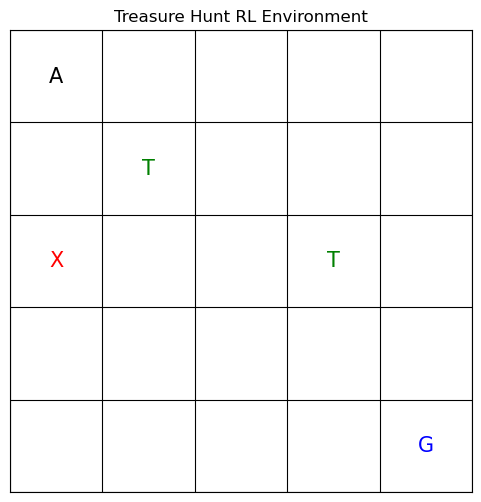

Step 1:
Action: Right
Next State: (0, 1)
Reward: 0


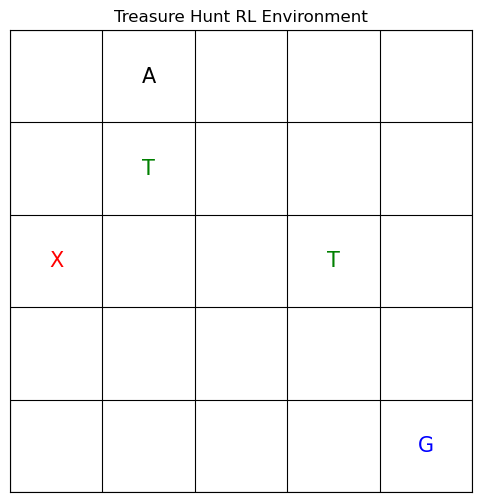

Step 2:
Action: Down
Next State: (1, 1)
Reward: 10


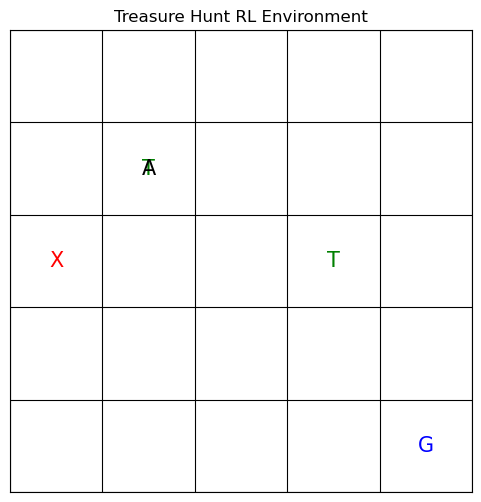

Step 3:
Action: Right
Next State: (1, 2)
Reward: 0


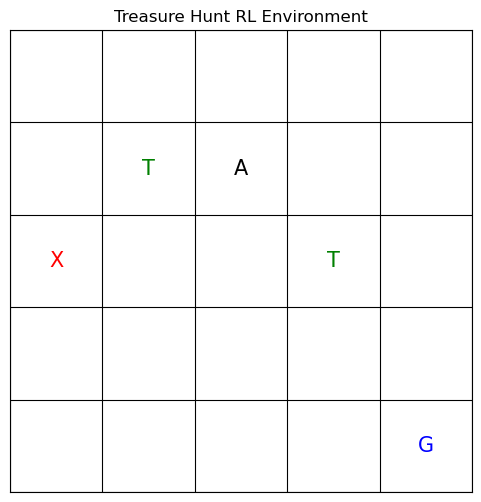

Step 4:
Action: Up
Next State: (0, 2)
Reward: 0


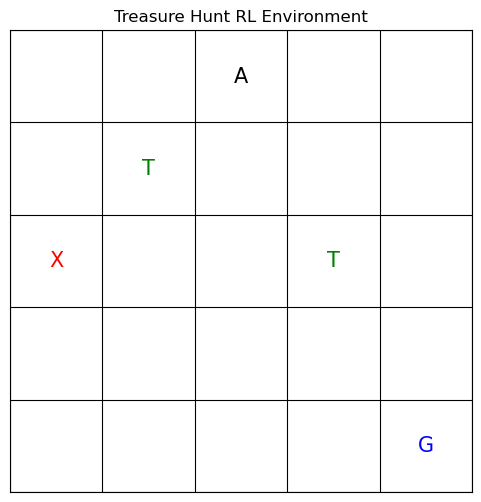

Step 5:
Action: Down
Next State: (1, 2)
Reward: 0


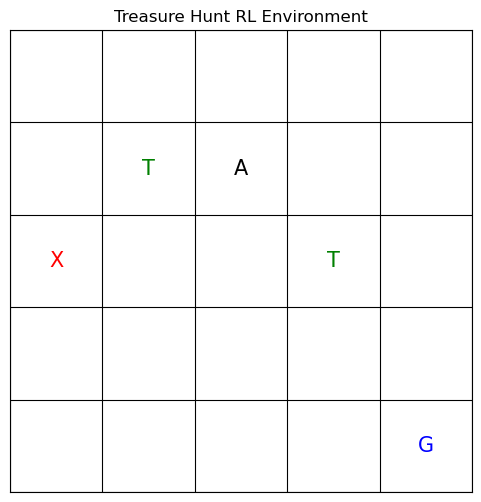

Step 6:
Action: Right
Next State: (1, 3)
Reward: 0


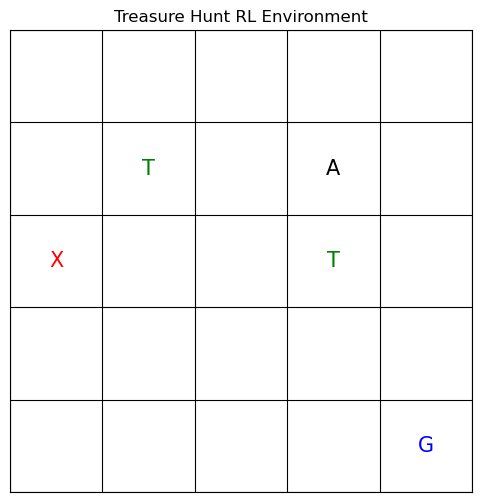

Step 7:
Action: Down
Next State: (2, 3)
Reward: 10


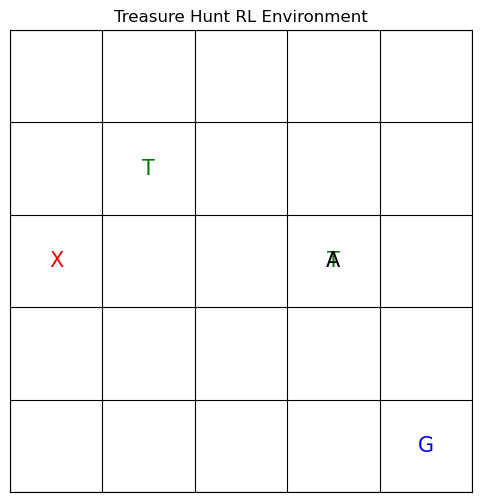

Step 8:
Action: Left
Next State: (2, 2)
Reward: 0


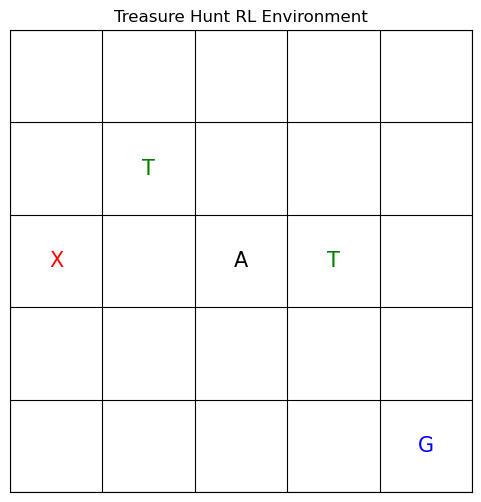

Step 9:
Action: Left
Next State: (2, 1)
Reward: 0


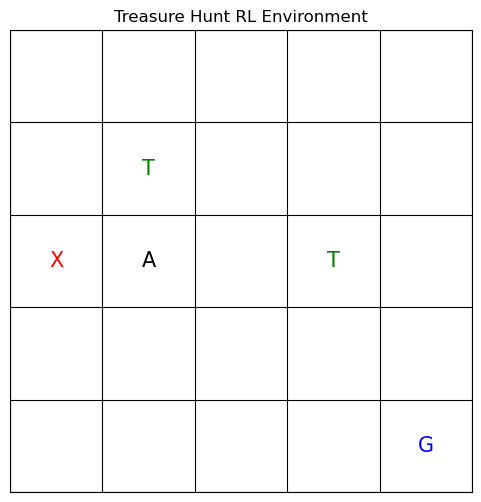

Step 10:
Action: Up
Next State: (1, 1)
Reward: 10


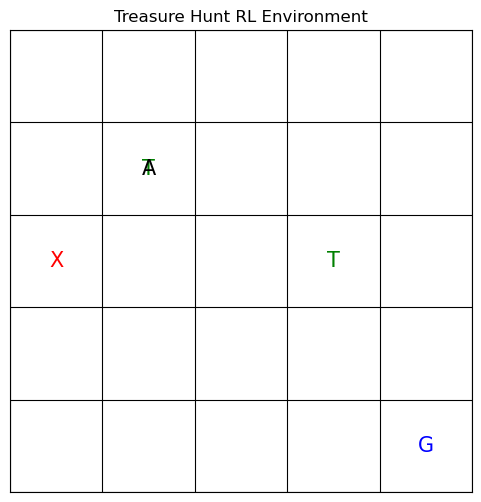

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

class TreasureHuntEnv:
    def __init__(self):
        self.action_space = ['Up', 'Down', 'Left', 'Right']
        self.state_space = [(x, y) for x in range(5) for y in range(5)]  # 5x5 grid
        self.rewards = {
            (1, 1): 10,# Treasure 1 worth 10
            (2, 3): 10, # Treasure 2 worth 10
            (2, 0): -10,# Trap penalty of -10
            (4, 4): 50 # Safehouse (goal)
        }
        self.current_state = (0, 0)# Starting state

    def step(self, action):
        x, y = self.current_state
        if action == 'Up':
            x = max(0, x - 1)
        elif action == 'Down':
            x = min(4, x + 1)
        elif action == 'Left':
            y = max(0, y - 1)
        elif action == 'Right':
            y = min(4, y + 1)

        self.current_state = (x, y)
        reward = self.rewards.get(self.current_state, 0)
        done = self.current_state == (4, 4)# End when agentreached the goal
        return self.current_state, reward, done

    def reset(self):
        self.current_state = (0, 0)
        return self.current_state
    
    def render(self):
       
        grid = np.zeros((5, 5)) #5*5 grid for visualiaztion
        x, y = self.current_state # curent pos of agent

        plt.figure(figsize=(6, 6))

        for i in range(5): 
            for j in range(5):  
                # displaying the goal (G) at (4, 4)
                if (i, j) == (4, 4): #(4,4) is the safehouse/goal
                    plt.text(j + 0.5, 4 - i + 0.5, "G", ha='center', va='center', color="blue", fontsize=15)
                #displaying treasures (T) and traps (X)
                elif (i, j) in self.rewards:# does the cell has a reward/penalty
                    if self.rewards[(i, j)] > 0:# Treasure found
                        plt.text(j + 0.5, 4 - i + 0.5, "T", ha='center', va='center', color="green", fontsize=15)
                    elif self.rewards[(i, j)] < 0: #TRap Found
                        plt.text(j + 0.5, 4 - i + 0.5, "X", ha='center', va='center', color="red", fontsize=15)

        # plotting Agent A on top of the cell to reflect his state 
        plt.text(y + 0.5, 4 - x + 0.5, "A", ha='center', va='center', color="black", fontsize=15)

        #Grid visualizing
        for i in range(6): 
            plt.axhline(i, color='black', linewidth=0.8)
            plt.axvline(i, color='black', linewidth=0.8)

        plt.xlim(0, 5)
        plt.ylim(0, 5)

        plt.gca().set_aspect('equal', adjustable='box') 
        plt.gca().set_xticks([]) 
        plt.gca().set_yticks([])

        plt.title("Treasure Hunt RL Environment") 
        plt.show()



#RL simulation
env = TreasureHuntEnv()
state = env.reset()
print("Initial State:")
env.render()

#10 timesteps
for t in range(10):
    action = random.choice(env.action_space) #random choice
    next_state, reward, done = env.step(action)
    print(f"Step {t+1}:")
    print(f"Action: {action}")
    print(f"Next State: {next_state}")
    print(f"Reward: {reward}")
    env.render()
    if done:
        print("Reached the goal!")
        break
